In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = Path("./Resources/market.sqlite")
engine = create_engine(f"sqlite:///{path}")
connection = engine.connect()

In [2]:
# Read the 'market' table into a DataFrame
market_data = pd.read_sql('market', connection)

# Check data types
print(market_data.dtypes)

?                    object
Date                 object
Natural_Gas_Price    object
Natural_Gas_Vol.     object
Crude_oil_Price      object
Crude_oil_Vol.       object
Copper_Price         object
Copper_Vol.          object
Bitcoin_Price        object
Bitcoin_Vol.         object
Platinum_Price       object
Platinum_Vol.        object
Ethereum_Price       object
Ethereum_Vol.        object
S&P_500_Price        object
Nasdaq_100_Price     object
Nasdaq_100_Vol.      object
Apple_Price          object
Apple_Vol.           object
Tesla_Price          object
Tesla_Vol.           object
Microsoft_Price      object
Microsoft_Vol.       object
Silver_Price         object
Silver_Vol.          object
Google_Price         object
Google_Vol.          object
Nvidia_Price         object
Nvidia_Vol.          object
Berkshire_Price      object
Berkshire_Vol.       object
Netflix_Price        object
Netflix_Vol.         object
Amazon_Price         object
Amazon_Vol.          object
Meta_Price          

In [3]:
# Columns to be included in the targeted_data DataFrame
columns = ['Date','Gold_Price', 'Gold_Vol.', 'Copper_Price', 'Copper_Vol.', 'Silver_Price', 'Silver_Vol.', 
           'Bitcoin_Price', 'Bitcoin_Vol.', 'Ethereum_Price', 'Ethereum_Vol.']

# Extracting the specific columns
targeted_data = market_data[columns]


for column in targeted_data.columns:
    print(f"First 5 values of column '{column}':")
    print(market_data[column].head())
    print()  # This adds an empty line for better readability

First 5 values of column 'Date':
0    02-02-2024
1    01-02-2024
2    31-01-2024
3    30-01-2024
4    29-01-2024
Name: Date, dtype: object

First 5 values of column 'Gold_Price':
0    2,053.70
1    2,071.10
2    2,067.40
3    2,050.90
4    2,034.90
Name: Gold_Price, dtype: object

First 5 values of column 'Gold_Vol.':
0                      
1    260920.00000000003
2              238370.0
3              214590.0
4                1780.0
Name: Gold_Vol., dtype: object

First 5 values of column 'Copper_Price':
0    3.8215
1    3.8535
2     3.906
3     3.911
4     3.879
Name: Copper_Price, dtype: object

First 5 values of column 'Copper_Vol.':
0    
1    
2    
3    
4    
Name: Copper_Vol., dtype: object

First 5 values of column 'Silver_Price':
0    22.796
1    23.236
2    23.169
3    23.225
4    23.134
Name: Silver_Price, dtype: object

First 5 values of column 'Silver_Vol.':
0           
1    85160.0
2    66910.0
3    53370.0
4      330.0
Name: Silver_Vol., dtype: object

First 5 value

In [4]:
# First, explicitly create a new DataFrame to avoid setting values on a slice
targeted_data = market_data[columns].copy()

# Convert 'Date' to datetime format
targeted_data['Date'] = pd.to_datetime(targeted_data['Date'], format='%d-%m-%Y')

# Convert price columns to float
price_columns = ['Gold_Price', 'Copper_Price', 'Silver_Price', 'Bitcoin_Price', 'Ethereum_Price']
for col in price_columns:
    targeted_data[col] = targeted_data[col].str.replace(',', '').astype(float)

# Handle missing values in volume columns
volume_columns = ['Gold_Vol.', 'Copper_Vol.', 'Silver_Vol.', 'Bitcoin_Vol.', 'Ethereum_Vol.']

# Replace empty strings with NaN and convert to float
for col in volume_columns:
    targeted_data[col] = pd.to_numeric(targeted_data[col].replace('', np.nan), errors='coerce').fillna(0)

# Checking the first few rows and data types after cleaning
print(targeted_data.head())
print(targeted_data.dtypes)

        Date  Gold_Price  Gold_Vol.  Copper_Price  Copper_Vol.  Silver_Price  \
0 2024-02-02      2053.7        0.0        3.8215          0.0        22.796   
1 2024-02-01      2071.1   260920.0        3.8535          0.0        23.236   
2 2024-01-31      2067.4   238370.0        3.9060          0.0        23.169   
3 2024-01-30      2050.9   214590.0        3.9110          0.0        23.225   
4 2024-01-29      2034.9     1780.0        3.8790          0.0        23.134   

   Silver_Vol.  Bitcoin_Price  Bitcoin_Vol.  Ethereum_Price  Ethereum_Vol.  
0          0.0        43194.7       42650.0         2309.28       246890.0  
1      85160.0        43081.4       47690.0         2304.28       323610.0  
2      66910.0        42580.5       56480.0         2283.14       408790.0  
3      53370.0        42946.2       55130.0         2343.11       387120.0  
4        330.0        43299.8       45230.0         2317.79       318840.0  
Date              datetime64[ns]
Gold_Price              

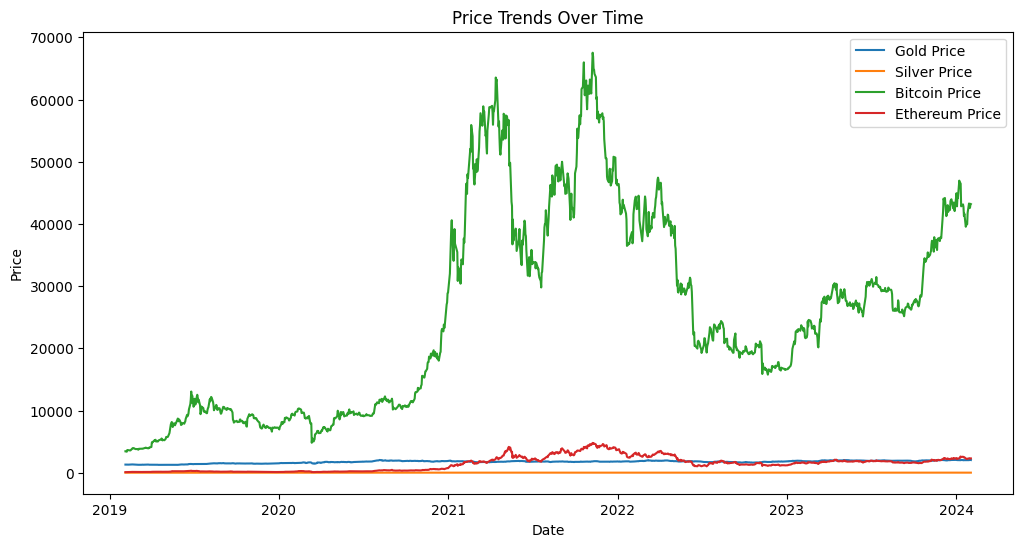

In [5]:
# Plotting Price Trends
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], targeted_data['Gold_Price'], label='Gold Price')
plt.plot(targeted_data['Date'], targeted_data['Silver_Price'], label='Silver Price')
plt.plot(targeted_data['Date'], targeted_data['Bitcoin_Price'], label='Bitcoin Price')
plt.plot(targeted_data['Date'], targeted_data['Ethereum_Price'], label='Ethereum Price')
plt.title('Price Trends Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

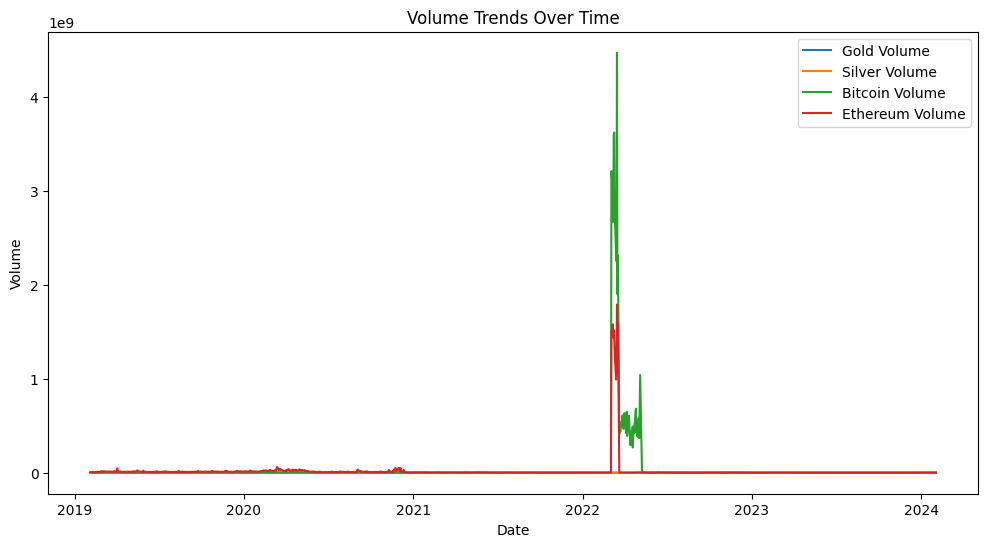

In [6]:
# Plotting Volume Trends
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], targeted_data['Gold_Vol.'], label='Gold Volume')
plt.plot(targeted_data['Date'], targeted_data['Silver_Vol.'], label='Silver Volume')
plt.plot(targeted_data['Date'], targeted_data['Bitcoin_Vol.'], label='Bitcoin Volume')
plt.plot(targeted_data['Date'], targeted_data['Ethereum_Vol.'], label='Ethereum Volume')
plt.title('Volume Trends Over Time')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend()
plt.show()

Gold Volatility:  0.010118063526698817
Silver Volatility:  0.02063888447642368
Bitcoin Volatility:  0.045167735518564484
Ethereum Volatility:  0.057868790714531756


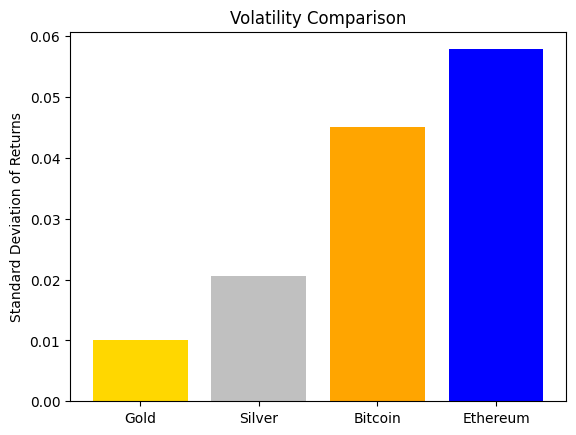

In [7]:
# Calculate daily returns as percentage change
targeted_data['Gold_Returns'] = targeted_data['Gold_Price'].pct_change()
targeted_data['Silver_Returns'] = targeted_data['Silver_Price'].pct_change()
targeted_data['Bitcoin_Returns'] = targeted_data['Bitcoin_Price'].pct_change()
targeted_data['Ethereum_Returns'] = targeted_data['Ethereum_Price'].pct_change()

# Calculate standard deviation (volatility) of returns
gold_volatility = targeted_data['Gold_Returns'].std()
silver_volatility = targeted_data['Silver_Returns'].std()
bitcoin_volatility = targeted_data['Bitcoin_Returns'].std()
ethereum_volatility = targeted_data['Ethereum_Returns'].std()

# Print the volatility
print("Gold Volatility: ", gold_volatility)
print("Silver Volatility: ", silver_volatility)
print("Bitcoin Volatility: ", bitcoin_volatility)
print("Ethereum Volatility: ", ethereum_volatility)

# Plotting the standard deviation (volatility) of each asset
assets = ['Gold', 'Silver', 'Bitcoin', 'Ethereum']
volatilities = [gold_volatility, silver_volatility, bitcoin_volatility, ethereum_volatility]

plt.bar(assets, volatilities, color=['gold', 'silver', 'orange', 'blue'])
plt.title('Volatility Comparison')
plt.ylabel('Standard Deviation of Returns')
plt.show()

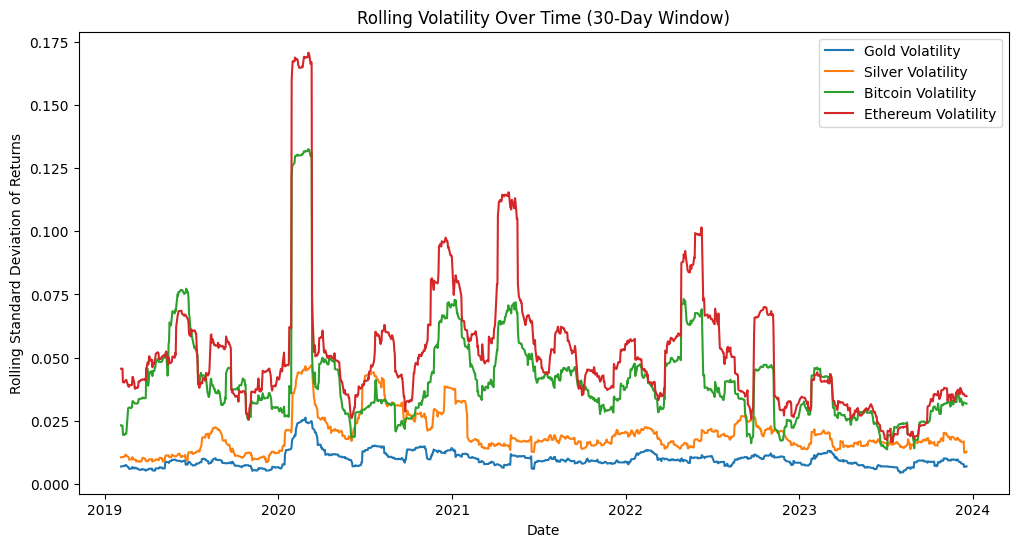

In [8]:
# Calculate daily returns
targeted_data['Gold_Returns'] = targeted_data['Gold_Price'].pct_change()
targeted_data['Silver_Returns'] = targeted_data['Silver_Price'].pct_change()
targeted_data['Bitcoin_Returns'] = targeted_data['Bitcoin_Price'].pct_change()
targeted_data['Ethereum_Returns'] = targeted_data['Ethereum_Price'].pct_change()

# Define the 30 day window
window = 30

# Calculate rolling volatility
targeted_data['Gold_Volatility'] = targeted_data['Gold_Returns'].rolling(window=window).std()
targeted_data['Silver_Volatility'] = targeted_data['Silver_Returns'].rolling(window=window).std()
targeted_data['Bitcoin_Volatility'] = targeted_data['Bitcoin_Returns'].rolling(window=window).std()
targeted_data['Ethereum_Volatility'] = targeted_data['Ethereum_Returns'].rolling(window=window).std()

# Plotting the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(targeted_data['Date'], targeted_data['Gold_Volatility'], label='Gold Volatility')
plt.plot(targeted_data['Date'], targeted_data['Silver_Volatility'], label='Silver Volatility')
plt.plot(targeted_data['Date'], targeted_data['Bitcoin_Volatility'], label='Bitcoin Volatility')
plt.plot(targeted_data['Date'], targeted_data['Ethereum_Volatility'], label='Ethereum Volatility')
plt.title('Rolling Volatility Over Time (30-Day Window)')
plt.ylabel('Rolling Standard Deviation of Returns')
plt.xlabel('Date')
plt.legend()
plt.show()

# Analysis:
High volatility is often associated with higher risk. Since the asset's price can change rapidly, there's more uncertainty about its future value.